## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras import regularizers
def build_mlp(input_shape, l1_ratio):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)

    num_neurons=[512, 256, 128]
    for i, n_units in enumerate(num_neurons):
      if i == 0:
          x = keras.layers.Dense(units=n_units, 
                                 activation="relu", 
                                 name="hidden_layer"+str(i+1), 
                                 kernel_regularizer=keras.regularizers.l1(l1_ratio))(input_layer)
      else:
          x = keras.layers.Dense(units=n_units, 
                                 activation="relu", 
                                 name="hidden_layer"+str(i+1),
                                 kernel_regularizer=keras.regularizers.l1(l1_ratio))(x)
    output_units=10
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0907 22:39:21.842387 14172 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0907 22:39:21.843384 14172 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0907 22:39:21.931668 14172 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 22:39:21.932617 14172 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0907 22:39:22.176309 14172 deprecation.py:323] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 196us/step - loss: 198.5035 - acc: 0.2534 - val_loss: 41.0209 - val_acc: 0.2693
Epoch 2/30
50000/50000 [==============================] - 3s 66us/step - loss: 19.0676 - acc: 0.1183 - val_loss: 7.2743 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 3s 65us/step - loss: 4.1073 - acc: 0.1000 - val_loss: 2.6542 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 3s 66us/step - loss: 2.4871 - acc: 0.0952 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 3s 66us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 3s 66us/step - loss: 2.4626 - acc: 0.0968 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 3s 67us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4626 - v

50000/50000 [==============================] - 3s 66us/step - loss: 4.0248 - acc: 0.5513 - val_loss: 4.0959 - val_acc: 0.5082
Epoch 23/30
50000/50000 [==============================] - 3s 66us/step - loss: 3.9645 - acc: 0.5536 - val_loss: 4.1130 - val_acc: 0.4933
Epoch 24/30
50000/50000 [==============================] - 3s 66us/step - loss: 3.9009 - acc: 0.5579 - val_loss: 3.9877 - val_acc: 0.5095
Epoch 25/30
50000/50000 [==============================] - 3s 66us/step - loss: 3.8418 - acc: 0.5610 - val_loss: 4.0007 - val_acc: 0.4937
Epoch 26/30
50000/50000 [==============================] - 3s 66us/step - loss: 3.7798 - acc: 0.5663 - val_loss: 3.8954 - val_acc: 0.5091
Epoch 27/30
50000/50000 [==============================] - 3s 67us/step - loss: 3.7209 - acc: 0.5706 - val_loss: 3.8224 - val_acc: 0.5170
Epoch 28/30
50000/50000 [==============================] - 3s 66us/step - loss: 3.6654 - acc: 0.5697 - val_loss: 3.8506 - val_acc: 0.4964
Epoch 29/30
50000/50000 [=====================

Epoch 6/30
50000/50000 [==============================] - 3s 65us/step - loss: 1.5867 - acc: 0.4423 - val_loss: 1.5721 - val_acc: 0.4477
Epoch 7/30
50000/50000 [==============================] - 3s 65us/step - loss: 1.5540 - acc: 0.4536 - val_loss: 1.5528 - val_acc: 0.4536
Epoch 8/30
50000/50000 [==============================] - 3s 65us/step - loss: 1.5225 - acc: 0.4655 - val_loss: 1.5284 - val_acc: 0.4599
Epoch 9/30
50000/50000 [==============================] - 3s 65us/step - loss: 1.4943 - acc: 0.4750 - val_loss: 1.5226 - val_acc: 0.4596
Epoch 10/30
50000/50000 [==============================] - 3s 65us/step - loss: 1.4689 - acc: 0.4845 - val_loss: 1.4882 - val_acc: 0.4731
Epoch 11/30
50000/50000 [==============================] - 3s 65us/step - loss: 1.4444 - acc: 0.4921 - val_loss: 1.4755 - val_acc: 0.4783
Epoch 12/30
50000/50000 [==============================] - 3s 65us/step - loss: 1.4206 - acc: 0.4990 - val_loss: 1.4636 - val_acc: 0.4820
Epoch 13/30
50000/50000 [=============

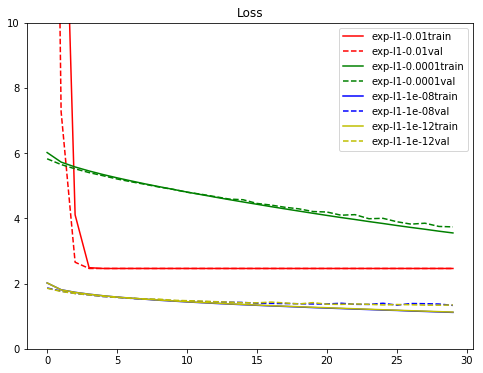

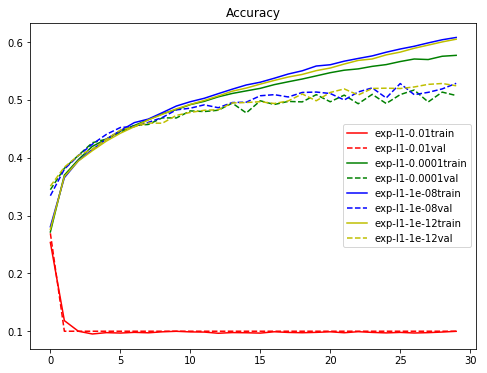

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond+'train', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond+'val', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 10])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond+'train', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond+'val', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()